In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fontTools.subset import subset

## Data Cleaning Summary

This dataset contained non-standard missing values represented by `'?'` and extra spaces around string entries.  
I replaced all `'?'` with proper `NaN` values using `na_values=["?"]` and trimmed spaces from text columns with `skipinitialspace=True`.  
After cleaning, missing values now appear as `NaN`, and all string fields are consistently formatted, ensuring reliable preprocessing and analysis.


In [57]:
df = pd.read_csv('../data/adult/adult.data.csv', na_values=['?'], skipinitialspace=True)
df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.sample(50)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
5242,50,Private,202296,Assoc-voc,11,Separated,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
1759,42,Private,251795,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,>50K
30771,24,Private,206827,Some-college,10,Never-married,Sales,Own-child,White,Female,5060,0,30,United-States,<=50K
4195,76,Self-emp-inc,120796,9th,5,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
30355,21,State-gov,164922,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
20965,47,Private,184402,HS-grad,9,Divorced,Other-service,Not-in-family,White,Male,0,0,32,United-States,<=50K
20206,19,Private,264390,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,2001,40,United-States,<=50K
16517,49,Private,236586,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
26052,35,Private,330664,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
24678,31,Private,209101,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,25,United-States,>50K


In [58]:
for col in df.columns:
    unique = df[col].unique()
    print(f"{col}: {unique[:10]}")

age: [50 38 53 28 37 49 52 31 42 30]
workclass: ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt: [ 83311 215646 234721 338409 284582 160187 209642  45781 159449 280464]
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate']
education_num: [13  9  7 14  5 10 12 11  4 16]
marital_status: ['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct']
relationship: ['Husband' 'Not-in-family' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex: ['Male' 'Female']
capital_gain: [    0 14084  5178  5013  2407 14344 15024  7688 34095  4064]
capital_

In [59]:
df.shape

(32560, 15)

In [60]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

## Handling Missing Categorical Data

The dataset contained missing values in **`workclass`**, **`occupation`**, and **`native_country`** columns.

- For **`workclass`** and **`occupation`**, missing values were replaced with `"Unknown"` to preserve all records and allow the model to learn from this category.  
- For **`native_country`**, the missing values represented less than 1% of the data, so those rows were safely dropped.

This approach ensures data completeness where missingness may carry meaning while maintaining dataset integrity overall.


In [61]:
df["occupation"] = df["occupation"].fillna("Unknown")
df["workclass"] = df["workclass"].fillna("Unknown")
df = df.dropna(subset=["native_country"])

In [62]:
df.isnull().sum().sum()

np.int64(0)

In [63]:
df.duplicated().sum()

np.int64(23)

In [64]:
df = df.drop_duplicates()

## Data Visualization

### Line Chart
Line chart is proper for displaying a trend over a sequence or time series. However, we can use it to show the distribution for discrete numeric values. 

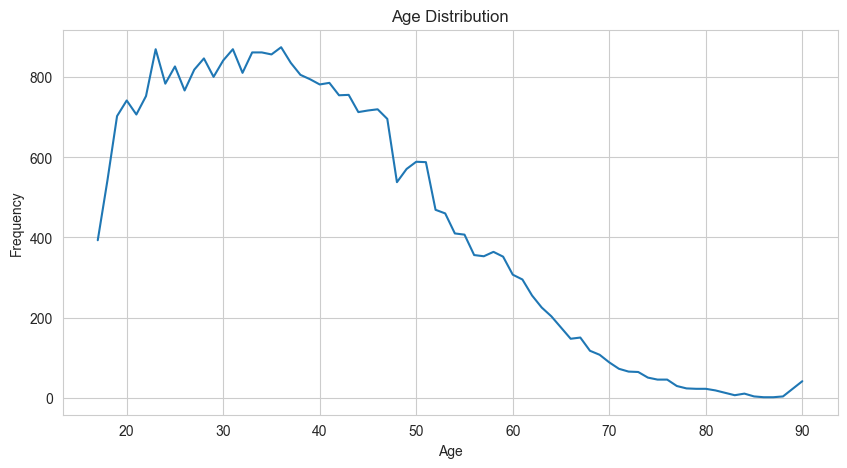

In [69]:
df['age'].value_counts().sort_index().plot(kind='line', figsize=(10, 5))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()